In [34]:
import requests
from PIL import Image
import io
import base64

def buildUrl(ignApiKey, ignLayer, style, format, service, x, y, z):
    url = f'https://wxs.ign.fr/{ignApiKey}/geoportail/wmts?' + \
        f'&REQUEST=GetTile&SERVICE=WMTS&VERSION=1.0.0&TILEMATRIXSET=PM' + \
        f'&LAYER={ignLayer}&STYLE={style}&FORMAT={format}' + \
        f'&TILECOL={x}&TILEROW={y}&TILEMATRIX={z}'

    return url

In [35]:
paramsPlan = dict(
    ignApiKey='decouverte',
    ignLayer='GEOGRAPHICALGRIDSYSTEMS.PLANIGNV2',
    style='normal',
    format='image/png',
    service='WMTS',
)

paramsImage = dict(
    ignApiKey='decouverte',
    ignLayer='ORTHOIMAGERY.ORTHOPHOTOS',
    style='normal',
    format='image/jpeg',
    service='WMTS',
)

In [36]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def compare(imgs):
    fig = plt.figure(figsize=(15, 7))
    outer = gridspec.GridSpec(1, 2, wspace=0.15, hspace=0)

    for i in range(2):
        inner = gridspec.GridSpecFromSubplotSpec(2, 2,
                        subplot_spec=outer[i], wspace=0.01, hspace=0.01)

        for j in range(4):
            ax = plt.Subplot(fig, inner[j])
            ax.imshow(imgs[i*4+j])
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)

        fig.show()

def show_around(x, y, z, flux=paramsImage):
    fig, axs = plt.subplots(2,2, figsize=(7, 7))
    plt.subplots_adjust(wspace=0.01, hspace=0.01)
    
    imgs=[]
    for ir, r in enumerate(axs):
        for ic, c in enumerate(r):
            img = get_img(x+ic, y+ir, z, flux=flux)
            c.set_axis_off()
            c.imshow(img)

    return imgs

def get_img(x, y, z, flux=paramsImage):
    url = buildUrl(**flux, x=x, y=y, z=z)
    img = Image.open(io.BytesIO(requests.get(url).content)).convert('RGBA')
    return img

259 172 9


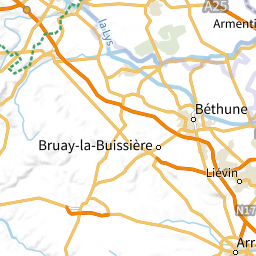

In [93]:
x = 519
y = 345
z = 9

x = int(x*2**(z-10))
y = int(y*2**(z-10))

print(x,y,z)

get_img(x, y, z, flux=paramsPlan)

In [ ]:
x = 519
y = 352
z = 15

x = x*2**(z-10)
y = y*2**(z-10)

imgs_map = []
for f in (paramsImage, paramsPlan):
    for i in range(2):
        for j in range(2):
            imgs_map.append(get_img(x+j, y+i, z, flux=f))

compare(imgs_map)

In [ ]:
X = 519
Y = 362
Z = 15

def get4x4(x, y, z):
    imgs_map = []
    names = []
    for f in (paramsImage, paramsPlan):
        for i in range(2):
            for j in range(2):
                imgs_map.append(get_img(x+j, y+i, z, flux=f))
                names.append(f'{x}_{y}_{z}_{f["ignLayer"]}')
    
    return imgs_map, names


all_imgs = []
all_names = []
for dX in range(-5,5):
    for dY in range(-5,5):
        x = X + dX
        y = Y + dY

        x = x*2**(Z-10)
        y = y*2**(Z-10)

        imgs, names = get4x4(x, y, Z)
        
        all_imgs.append(imgs)
        all_names.append(names)
        
        compare(imgs)
        plt.show()

In [16]:
save_path = '/Users/rgres/sandbox/STABLEDIFFUSION'

for imgs, names in zip(all_imgs, all_names):
    for img, name in zip(imgs, names):
        img.save(save_path+'/'+name+'.png')